In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import statsmodels.api as sm

## Load the Dataset

In [2]:
pronostico=pd.read_csv("D:\\DS-Project\\pronostico_dataset.csv",sep=';')
pronostico

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


# EDA

### Check the Null value

In [3]:
pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


### Check the Duplicated value

In [4]:
pronostico[pronostico.duplicated()]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [5]:
pronostico.shape

(6000, 6)

In [6]:
pronostico.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [7]:
pronostico['prognosis'].unique()

array(['retinopathy', 'no_retinopathy'], dtype=object)

In [8]:
pronostico.drop(columns='ID',axis=1,inplace=True)

In [9]:
pronostico.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


### Categorizing the data

In [10]:
pronostico.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

## Visualization

<AxesSubplot:xlabel='age', ylabel='Density'>

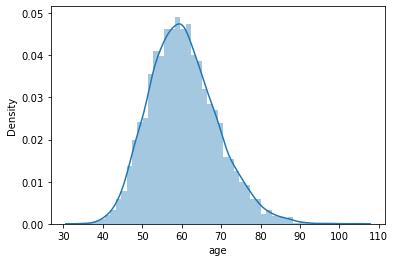

In [11]:
sns.distplot(pronostico['age'])

<AxesSubplot:xlabel='systolic_bp', ylabel='Density'>

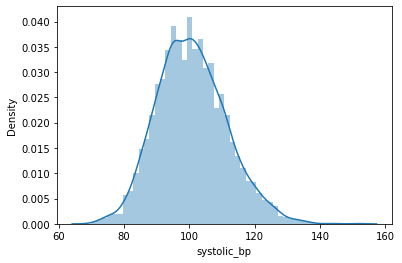

In [12]:
sns.distplot(pronostico['systolic_bp'])

<AxesSubplot:xlabel='diastolic_bp', ylabel='Density'>

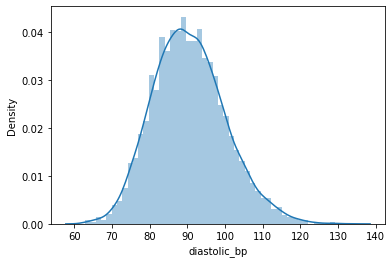

In [13]:
sns.distplot(pronostico['diastolic_bp'])

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

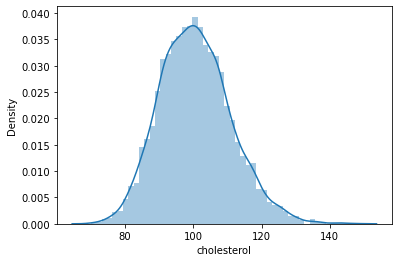

In [14]:
sns.distplot(pronostico['cholesterol'])

<AxesSubplot:xlabel='prognosis', ylabel='count'>

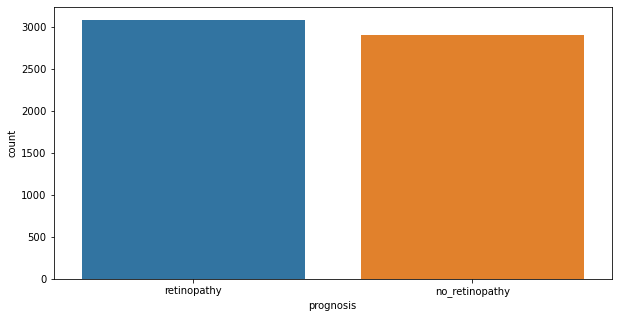

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(pronostico['prognosis'])

<AxesSubplot:xlabel='age'>

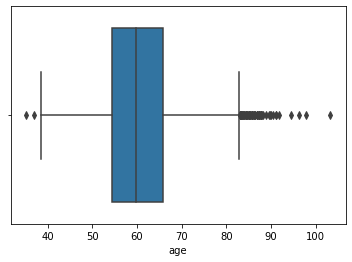

In [16]:
sns.boxplot(pronostico['age'])

<AxesSubplot:xlabel='systolic_bp'>

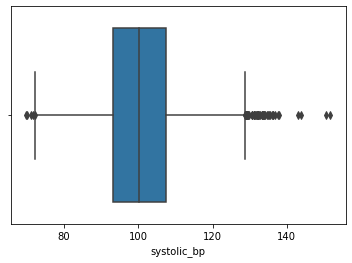

In [17]:
sns.boxplot(pronostico['systolic_bp'])

<AxesSubplot:xlabel='diastolic_bp'>

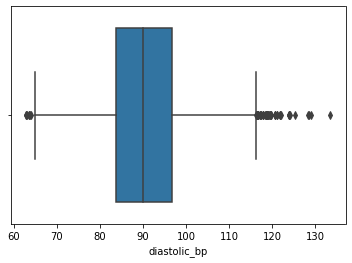

In [18]:
sns.boxplot(pronostico['diastolic_bp'])

<AxesSubplot:xlabel='cholesterol'>

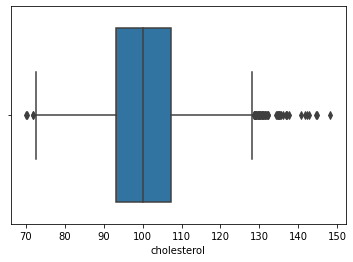

In [19]:
sns.boxplot(pronostico['cholesterol'])

(array([ 204., 2232., 2647.,  810.,  103.,    4.]),
 array([ 35.16476093,  46.51721698,  57.86967303,  69.22212909,
         80.57458514,  91.92704119, 103.27949725]),
 <BarContainer object of 6 artists>)

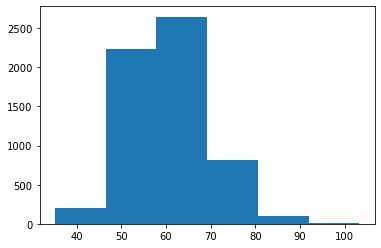

In [20]:
plt.hist(pronostico['age'],bins=6)

(array([ 229., 2120., 2624.,  901.,  122.,    4.]),
 array([ 69.67542853,  83.34613381,  97.01683909, 110.68754437,
        124.35824966, 138.02895494, 151.69966022]),
 <BarContainer object of 6 artists>)

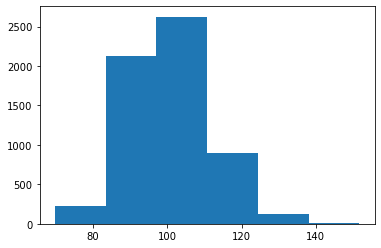

In [21]:
plt.hist(pronostico['systolic_bp'],bins=6)

(array([ 213., 1906., 2650., 1035.,  183.,   13.]),
 array([ 62.80710491,  74.58198445,  86.356864  ,  98.13174354,
        109.90662308, 121.68150263, 133.45638217]),
 <BarContainer object of 6 artists>)

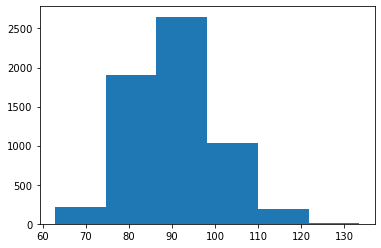

In [22]:
plt.hist(pronostico['diastolic_bp'],bins=6)

(array([ 205., 1906., 2709., 1012.,  154.,   14.]),
 array([ 69.96745265,  83.01180127,  96.05614988, 109.1004985 ,
        122.14484711, 135.18919573, 148.23354434]),
 <BarContainer object of 6 artists>)

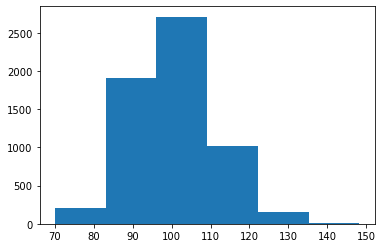

In [23]:
plt.hist(pronostico['cholesterol'],bins=6)

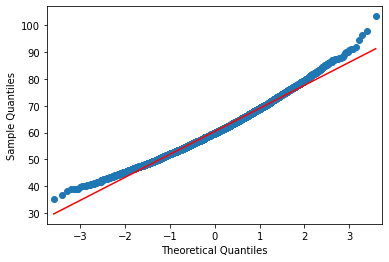

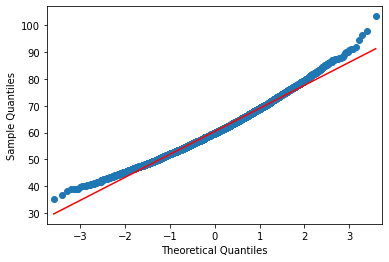

In [24]:
sm.qqplot(pronostico.age,line='s')

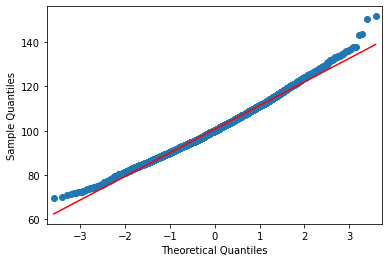

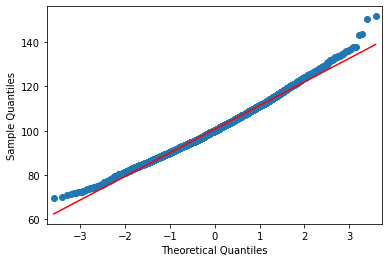

In [25]:
sm.qqplot(pronostico.systolic_bp,line='s')

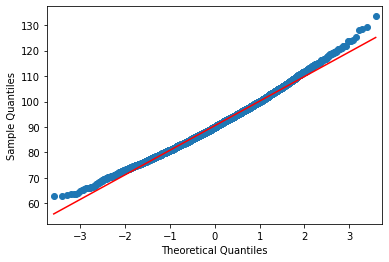

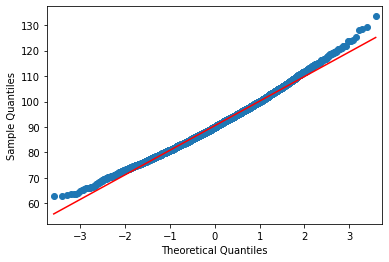

In [26]:
sm.qqplot(pronostico.diastolic_bp,line='s')

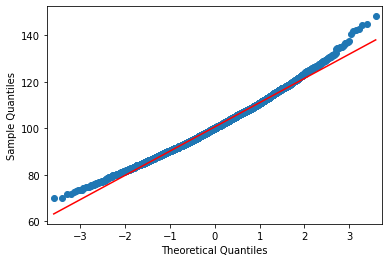

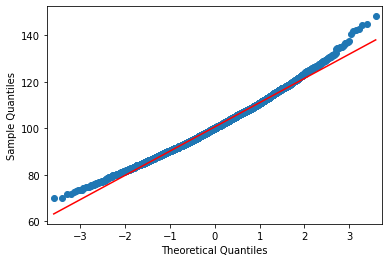

In [27]:
sm.qqplot(pronostico.cholesterol,line='s')

In [28]:
pronostico.corr()

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.010361,-0.005410,-0.006972
systolic_bp,0.010361,1.000000,0.405406,0.406029
diastolic_bp,-0.005410,0.405406,1.000000,0.398345
cholesterol,-0.006972,0.406029,0.398345,1.000000


<AxesSubplot:>

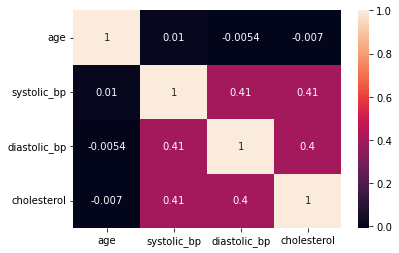

In [29]:
sns.heatmap(pronostico.corr(),annot=True)

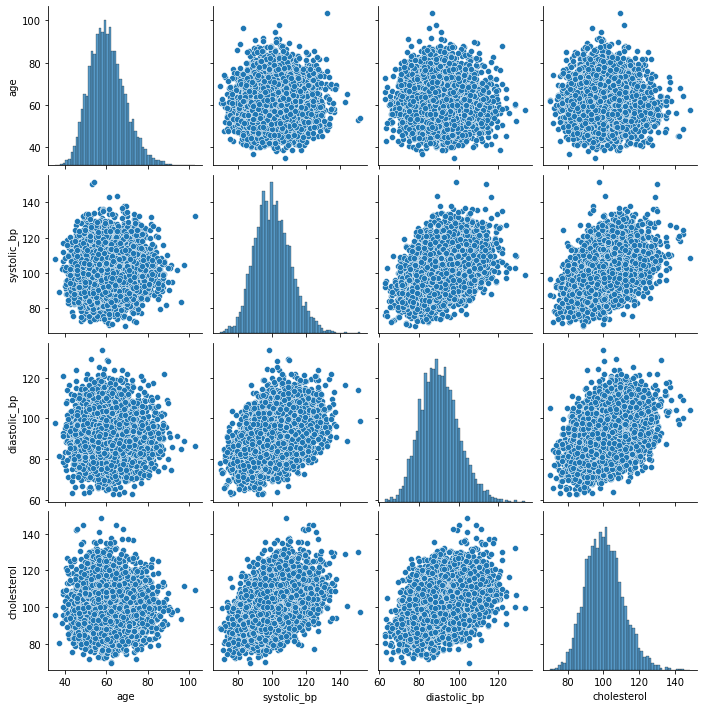

In [30]:
sns.pairplot(pronostico)
plt.show()

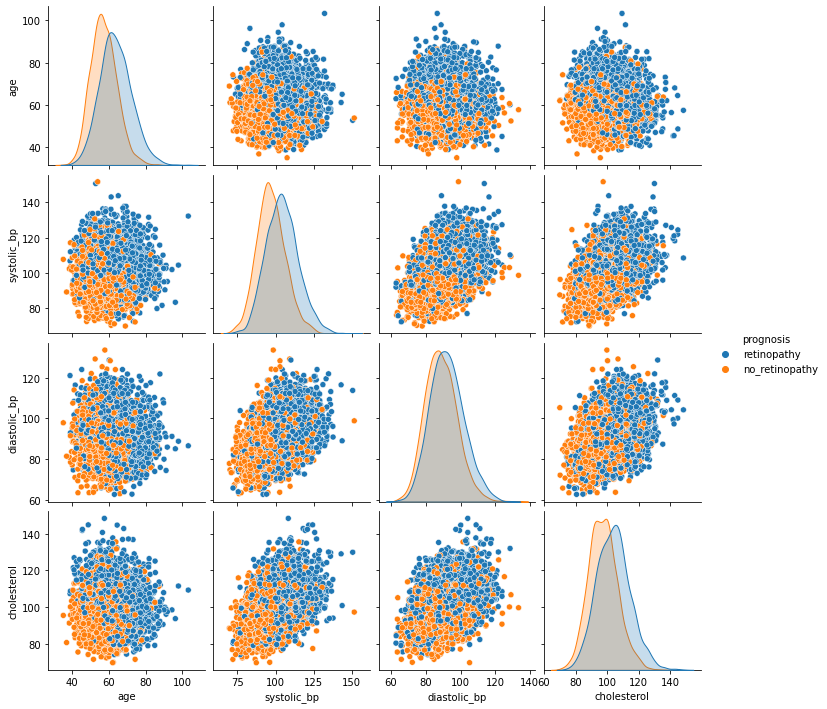

In [31]:
sns.pairplot(pronostico,hue='prognosis')

## Outliers

<AxesSubplot:>

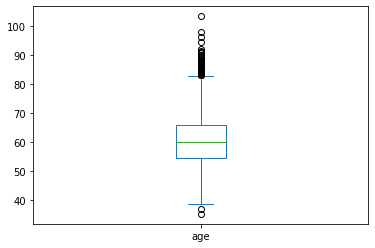

In [32]:
pronostico.age.plot(kind='box')

<AxesSubplot:>

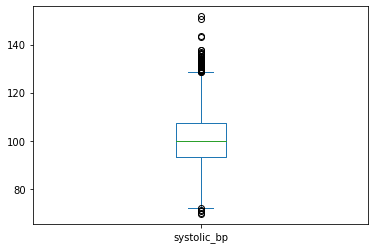

In [33]:
pronostico.systolic_bp.plot(kind='box')

<AxesSubplot:>

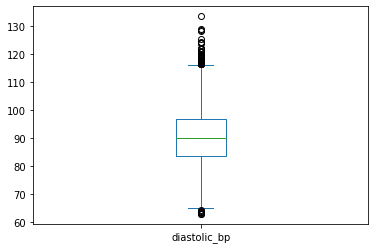

In [34]:
pronostico.diastolic_bp.plot(kind='box')

<AxesSubplot:>

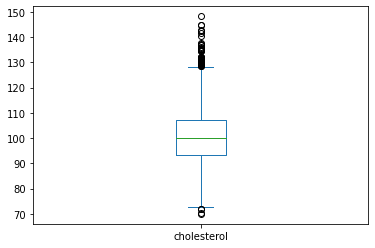

In [35]:
pronostico.cholesterol.plot(kind='box')

In [36]:
age_out=pronostico[(((pronostico.age-pronostico.age.mean())/pronostico.age.std())>3) | (((pronostico.age-pronostico.age.mean())/pronostico.age.std())<-3)]
sys_out=pronostico[(((pronostico.systolic_bp-pronostico.systolic_bp.mean())/pronostico.systolic_bp.std())>3) | (((pronostico.systolic_bp-pronostico.systolic_bp.mean())/pronostico.systolic_bp.std())<-3)]
dia_out=pronostico[(((pronostico.diastolic_bp-pronostico.diastolic_bp.mean())/pronostico.diastolic_bp.std())>3) | (((pronostico.diastolic_bp-pronostico.diastolic_bp.mean())/pronostico.diastolic_bp.std())<-3)]
col_out=pronostico[(((pronostico.cholesterol-pronostico.cholesterol.mean())/pronostico.cholesterol.std())>3) | (((pronostico.cholesterol-pronostico.cholesterol.mean())/pronostico.cholesterol.std())<-3)]

In [37]:
out=pd.concat([age_out,sys_out,dia_out,col_out])
out.drop_duplicates(inplace=True)
out

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
494,88.192280,105.019242,96.770507,102.213642,retinopathy
898,86.919000,98.832910,91.423936,111.608300,retinopathy
943,88.991259,81.420801,95.767988,104.277551,retinopathy
1054,94.381111,101.794209,91.183143,98.603710,retinopathy
1351,87.523454,91.807235,84.977094,98.335758,retinopathy
...,...,...,...,...,...
4886,67.461640,109.394057,117.753062,136.812161,retinopathy
5155,45.591349,120.950071,97.291452,142.280689,retinopathy
5336,48.759074,124.335522,108.984458,144.712660,retinopathy
5429,61.932287,105.754866,117.400561,134.705126,retinopathy


In [38]:
print('age_outliers:{}'.format(len(age_out)),'systolic_bp outliers:{}'.format(len(sys_out)),'diastolic_bp outliers:{}'.format(len(dia_out)),'cholesterol outliers:{}'.format(len(col_out)),sep='\n')

age_outliers:30
systolic_bp outliers:22
diastolic_bp outliers:21
cholesterol outliers:22


In [39]:
age_out_iqr=pronostico[(pronostico.age>(pronostico.age.quantile(0.75)+1.5*(pronostico.age.quantile(0.75)-pronostico.age.quantile(0.25)))) | (pronostico.age<(pronostico.age.quantile(0.25)-1.5*(pronostico.age.quantile(0.75)-pronostico.age.quantile(0.25))))]
sys_out_iqr=pronostico[(pronostico.systolic_bp>(pronostico.systolic_bp.quantile(0.75)+1.5*(pronostico.systolic_bp.quantile(0.75)-pronostico.systolic_bp.quantile(0.25)))) | (pronostico.systolic_bp<(pronostico.systolic_bp.quantile(0.25)-1.5*(pronostico.systolic_bp.quantile(0.75)-pronostico.systolic_bp.quantile(0.25))))]
dia_out_iqr=pronostico[(pronostico.diastolic_bp>(pronostico.diastolic_bp.quantile(0.75)+1.5*(pronostico.diastolic_bp.quantile(0.75)-pronostico.diastolic_bp.quantile(0.25)))) | (pronostico.diastolic_bp<(pronostico.diastolic_bp.quantile(0.25)-1.5*(pronostico.diastolic_bp.quantile(0.75)-pronostico.diastolic_bp.quantile(0.25))))]
col_out_iqr=pronostico[(pronostico.cholesterol>(pronostico.cholesterol.quantile(0.75)+1.5*(pronostico.cholesterol.quantile(0.75)-pronostico.cholesterol.quantile(0.25)))) | (pronostico.cholesterol<(pronostico.cholesterol.quantile(0.25)-1.5*(pronostico.cholesterol.quantile(0.75)-pronostico.cholesterol.quantile(0.25))))]


In [40]:
out_iqr=pd.concat([age_out_iqr,sys_out_iqr,dia_out_iqr,col_out_iqr])
out_iqr.drop_duplicates(inplace=True)
out_iqr

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
24,82.979636,100.211368,86.173067,97.026684,retinopathy
144,84.334735,120.766914,94.047859,107.825557,retinopathy
292,83.385591,99.193072,91.498595,94.259227,retinopathy
465,84.688583,100.999339,88.130268,99.921832,retinopathy
494,88.192280,105.019242,96.770507,102.213642,retinopathy
...,...,...,...,...,...
5164,50.548316,119.220357,100.476010,128.622094,retinopathy
5336,48.759074,124.335522,108.984458,144.712660,retinopathy
5477,64.122062,98.635651,107.255219,131.677153,no_retinopathy
5748,56.774707,110.354672,102.929523,136.074457,retinopathy


In [41]:
print('age outliers:{}'.format(len(age_out_iqr)),'systolic_bp ouliers:{}'.format(len(sys_out_iqr)),'diastolic_bp ouliers:{}'.format(len(dia_out_iqr)),'cholestrol outliers:{}'.format(len(col_out_iqr)),sep='\n')

age outliers:65
systolic_bp ouliers:55
diastolic_bp ouliers:55
cholestrol outliers:54


## Model Building

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [43]:
label_encoder = preprocessing.LabelEncoder()

In [44]:
pronostico['prognosis']= label_encoder.fit_transform(pronostico['prognosis'])

In [45]:
x=pronostico.iloc[:,:-1]
y=pronostico.iloc[:,-1]

In [46]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [47]:
x

array([[ 1.95385881, -1.44408831, -1.08668383, -1.98131478],
       [ 0.35799212, -0.12326958, -0.58598051,  0.93492889],
       [ 0.9972193 ,  0.9987116 ,  2.00521155,  0.01916893],
       ...,
       [-0.57240332, -0.21309482,  1.26379482,  1.94072729],
       [ 0.3508814 ,  0.5731393 , -0.25342752,  0.51988249],
       [ 0.23853111, -0.35563406, -0.37600957,  0.7665241 ]])

In [48]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int32

In [49]:
y.dtype

dtype('int32')

In [50]:
x.dtype

dtype('float64')

In [51]:
loo=KFold()
model=KNeighborsClassifier(n_neighbors=15)
results=cross_val_score(model ,x,y,cv=loo)

In [52]:
print(results.mean())

0.7370000000000001


In [53]:
import numpy 
n_neighbors = numpy.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [54]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid,cv=loo)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [55]:
print(grid.best_score_)
print(grid.best_params_)

0.7436666666666667
{'n_neighbors': 44}


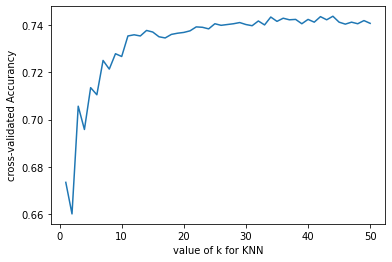

In [56]:
k_range=range(1,51)
k_scores=[]
loo=KFold()
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, x,y,cv=loo)
    k_scores.append(results.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accurancy')
plt.show()

### SVM

In [57]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [59]:
x_train.shape, y_train.shape

((4200, 4), (4200,))

In [60]:
x_test.shape, y_test.shape

((1800, 4), (1800,))

In [61]:
clf = SVC(C=10, gamma=0.001)
clf.fit(x_train, y_train)
y_pred_train= clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))


Accuracy = 75.0
[[1503  523]
 [ 527 1647]]


In [62]:
y_pred_test = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 73.44444444444444
[[664 223]
 [255 658]]


In [63]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       887
           1       0.75      0.72      0.73       913

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800



### Random Forest

### Hyper-parameter tuning

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [65]:
param_grid=[{'n_estimators':range(64,125),'max_depth':[2,3,4,5]}]
rf = RandomForestClassifier(max_features=4,max_depth=3,criterion='gini',random_state=23)
gsrf = GridSearchCV(rf,param_grid,scoring='recall',n_jobs=1,cv=KFold)
gsrf.fit(x_train,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'n_splits'

In [ ]:
model_rf = RandomForestClassifier(n_estimators=107,max_depth=2, max_features=4,criterion='gini',random_state=23)
model_rf.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_rf.predict(x_test)))
print(metrics.recall_score(y_test,model_rf.predict(x_test)))
print( metrics.classification_report(y_test,model_rf.predict(x_test)))
print('confusion matrix:n/n',metrics.confusion_matrix(y_test,model_rf.predict(x_test)))
accuracy['rf']=metrics.accuracy_score(y_test,model_rf.predict(x_test))
recall['rf']=metrics.recall_score(y_test,model_rf.predict(x_test))
precision['rf']=metrics.precision_score(y_test,model_rf.predict(x_test))
f1['rf']=metrics.f1_score(y_test,model_rf.predict(x_test))
models['rf']=model_rf